In [31]:
# Import packages
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Import CSV
full_df = pd.read_csv('medical_clean.csv')

In [3]:
# List columns
full_df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [4]:
# Reduce dataset to necessary columns related to research question
columns = ['Lat', 'Population', 'Area', 'Children', 'Age', 'Income', 'Marital', 'Gender', 
                   'VitD_levels']
df = full_df[columns]

# Check for null values

In [5]:
# Initial check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Lat          10000 non-null  float64
 1   Population   10000 non-null  int64  
 2   Area         10000 non-null  object 
 3   Children     10000 non-null  int64  
 4   Age          10000 non-null  int64  
 5   Income       10000 non-null  float64
 6   Marital      10000 non-null  object 
 7   Gender       10000 non-null  object 
 8   VitD_levels  10000 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 703.2+ KB


In [6]:
# Check for abnormal representations of null values. Also helps with checking for partial duplicates.
for col in columns:
    print(col)
    print(df[col].value_counts(dropna=False))
    print()
    print()

Lat
36.06702    4
33.34798    4
35.25512    4
39.38610    4
37.86890    4
           ..
41.00911    1
39.20560    1
46.36035    1
34.96563    1
40.49998    1
Name: Lat, Length: 8588, dtype: int64


Population
0        109
195       14
115       11
178       11
285       11
        ... 
8092       1
11147      1
27175      1
7371       1
41524      1
Name: Population, Length: 5951, dtype: int64


Area
Rural       3369
Suburban    3328
Urban       3303
Name: Area, dtype: int64


Children
0     2548
1     2509
3     1489
2     1475
4      995
7      213
8      209
6      191
5      169
9      108
10      94
Name: Children, dtype: int64


Age
47    161
52    159
74    159
41    157
86    156
     ... 
63    123
51    122
20    120
36    118
80    116
Name: Age, Length: 72, dtype: int64


Income
14572.40    2
20474.03    2
37132.97    2
29508.62    2
24997.02    2
           ..
41900.29    1
35093.92    1
44848.08    1
20815.96    1
62682.63    1
Name: Income, Length: 9993, dtype: int64


M

# Check for duplicates

In [7]:
# Check for complete duplicates
if df.duplicated().any():
    print('Has complete duplicates')
else:
    print('No complete duplicates')

No complete duplicates


# Check for outliers

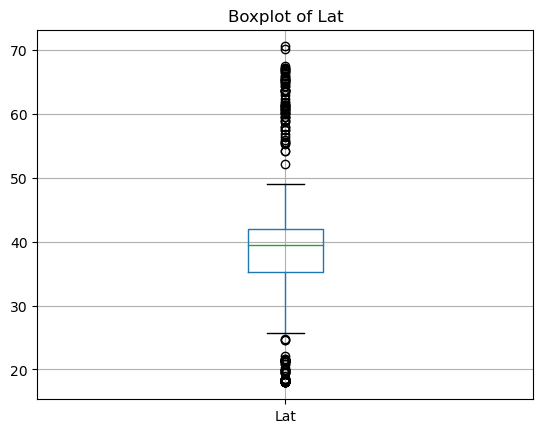

Lat has 150 outliers


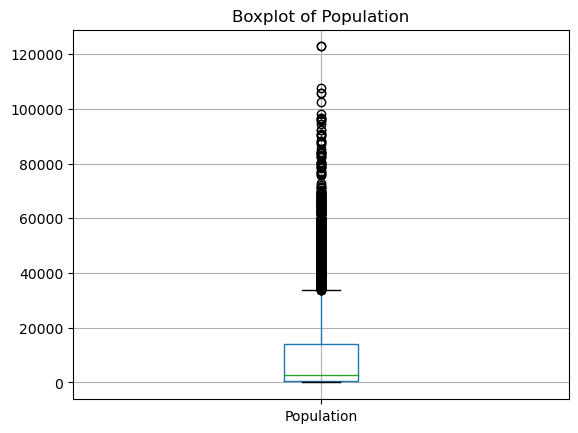

Population has 855 outliers

Value counts for Area
Rural       3369
Suburban    3328
Urban       3303
Name: Area, dtype: int64



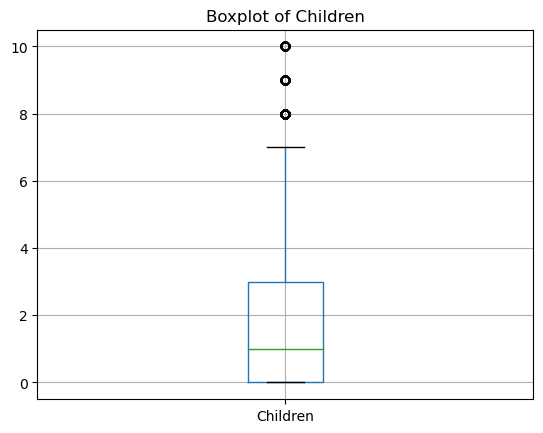

Children has 411 outliers


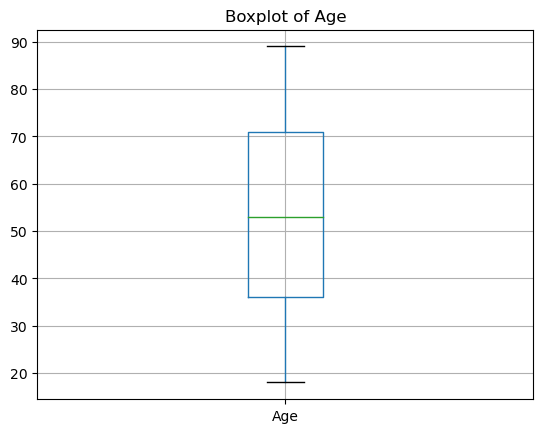

Age has 0 outliers


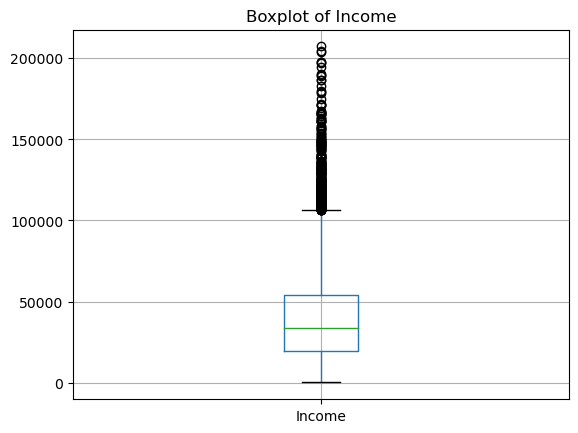

Income has 326 outliers

Value counts for Marital
Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: Marital, dtype: int64


Value counts for Gender
Female       5018
Male         4768
Nonbinary     214
Name: Gender, dtype: int64



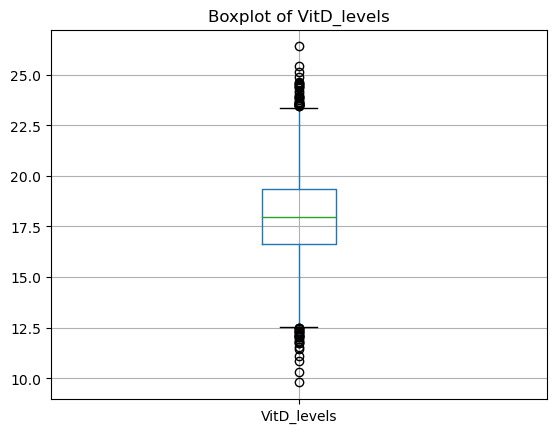

VitD_levels has 60 outliers


In [8]:
# Create boxplot and if outliers exist, calculate using IQR method
for col in columns:
    if df[col].dtype != 'object':
        # Create boxplot
        df.boxplot(column=col)
        plt.title(f'Boxplot of {col}')
        plt.show()
        
        # Calculate IQR lower and upper bounds to determine outliers
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count and display outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        num_outliers = outliers.shape[0]
        print(f"{col} has {num_outliers} outliers")     
        
        
    else:
        # For categorical variables, determine if any category makes up a small percentage
        print()
        print(f'Value counts for {col}')
        print(df[col].value_counts())
        print()

# Summary Statistics

In [9]:
# Produce summary statistics for each variable
for col in columns:
    print(f'Summary statistics for {col}')
    print(df[col].describe())
    print()

Summary statistics for Lat
count    10000.000000
mean        38.751099
std          5.403085
min         17.967190
25%         35.255120
50%         39.419355
75%         42.044175
max         70.560990
Name: Lat, dtype: float64

Summary statistics for Population
count     10000.000000
mean       9965.253800
std       14824.758614
min           0.000000
25%         694.750000
50%        2769.000000
75%       13945.000000
max      122814.000000
Name: Population, dtype: float64

Summary statistics for Area
count     10000
unique        3
top       Rural
freq       3369
Name: Area, dtype: object

Summary statistics for Children
count    10000.000000
mean         2.097200
std          2.163659
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: Children, dtype: float64

Summary statistics for Age
count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000


# Univariate Visualizations

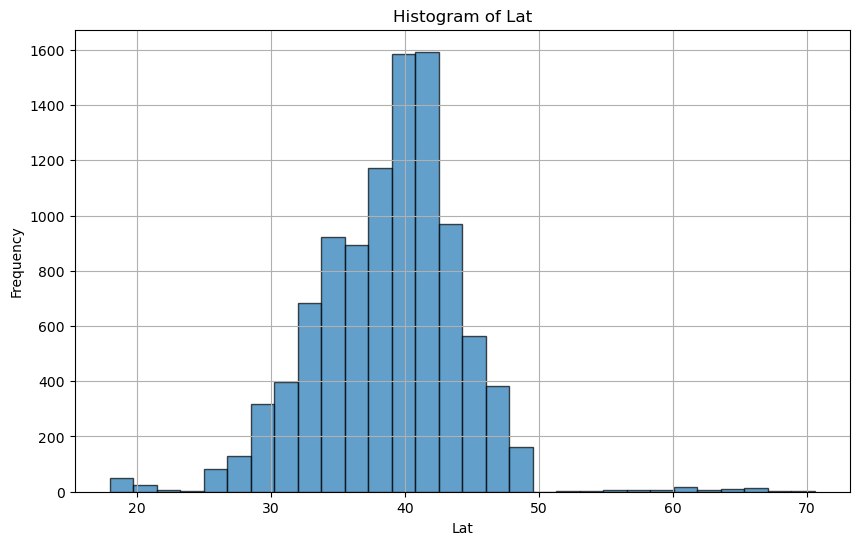

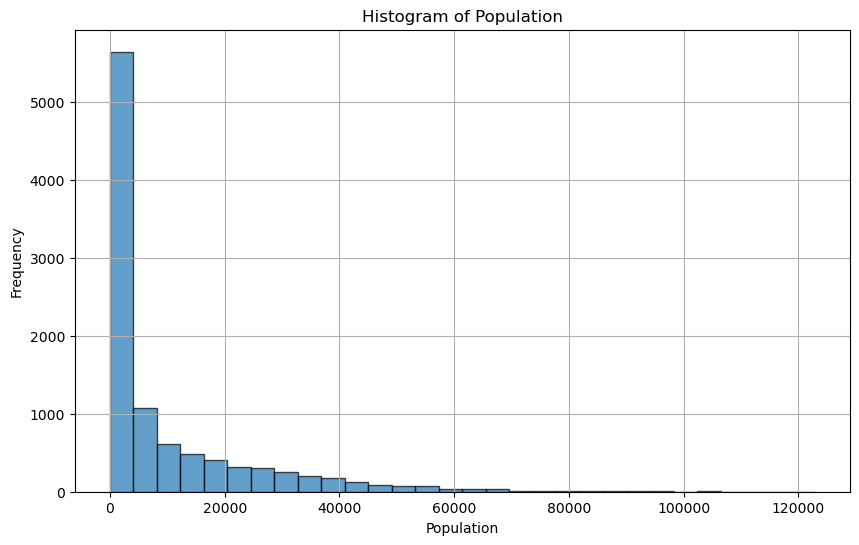

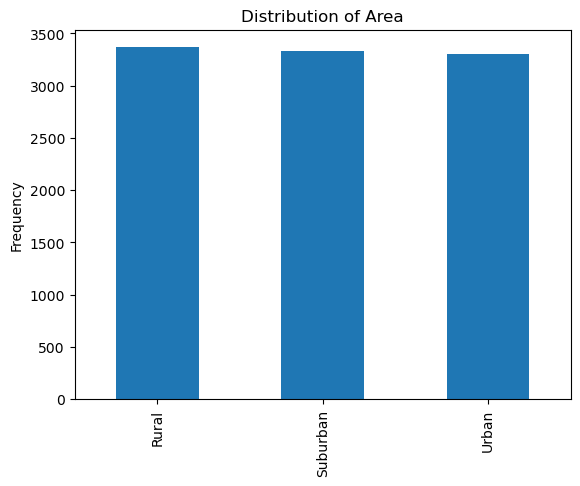

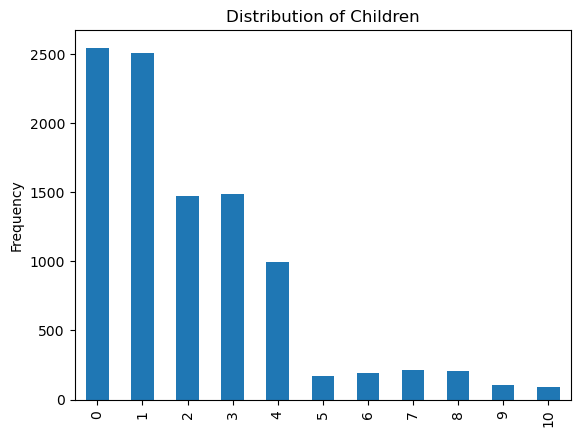

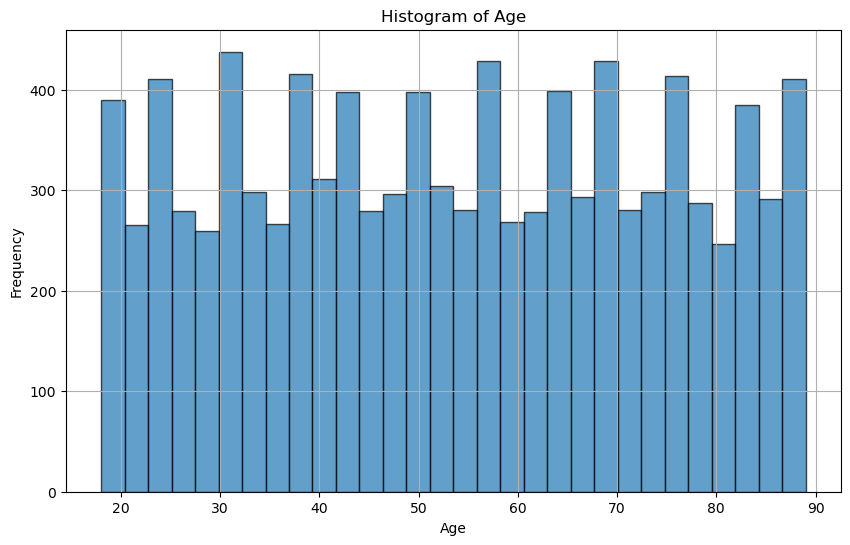

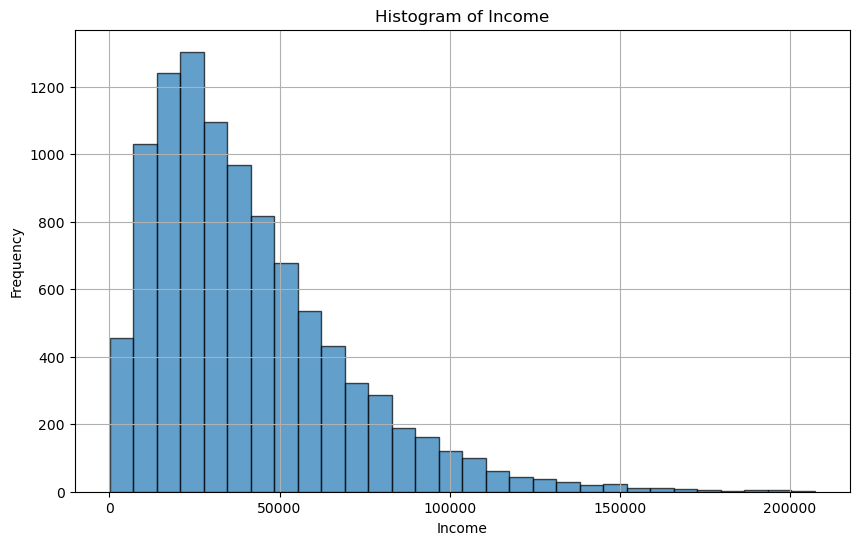

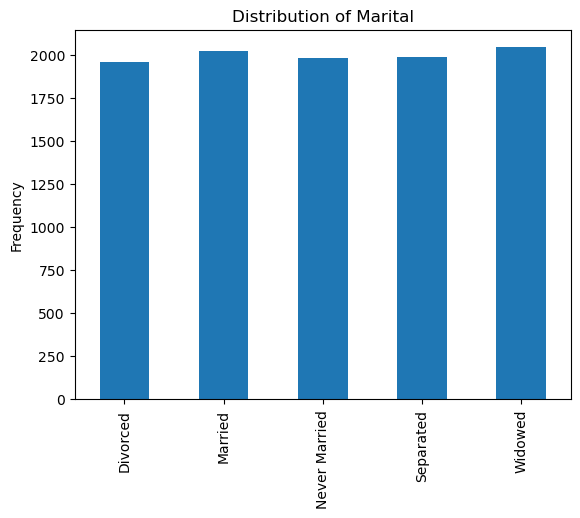

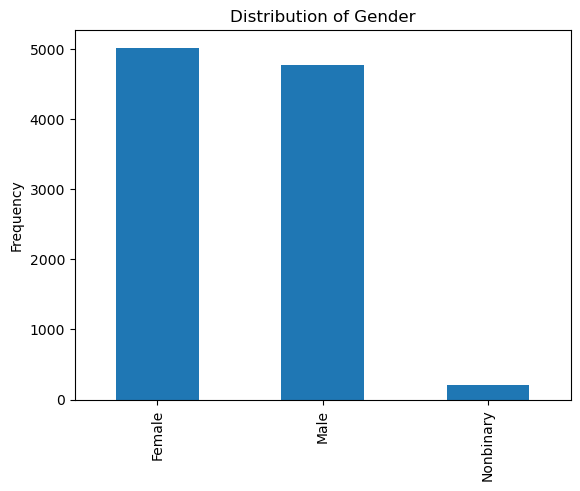

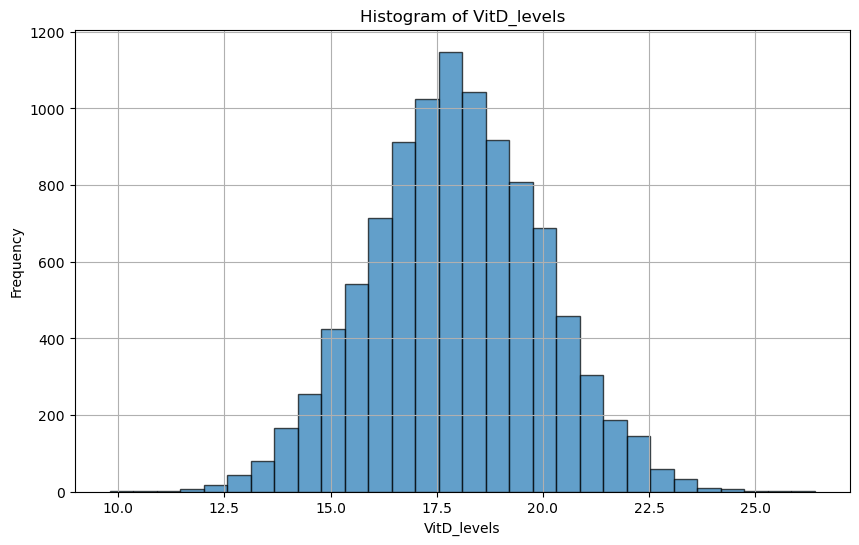

In [10]:
# Create univariate visualizations for each variable
for col in columns:
    if (df[col].dtype != 'object') & (col != 'Children'):
        plt.figure(figsize=(10, 6))
        plt.hist(df[col], bins=30, edgecolor='k', alpha=0.7)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
    else:
        value_counts = df[col].value_counts().sort_index()
        value_counts.plot(kind='bar')
        plt.title(f'Distribution of {col}')
        plt.ylabel('Frequency')
        plt.show()

# Bivariate Visualizations

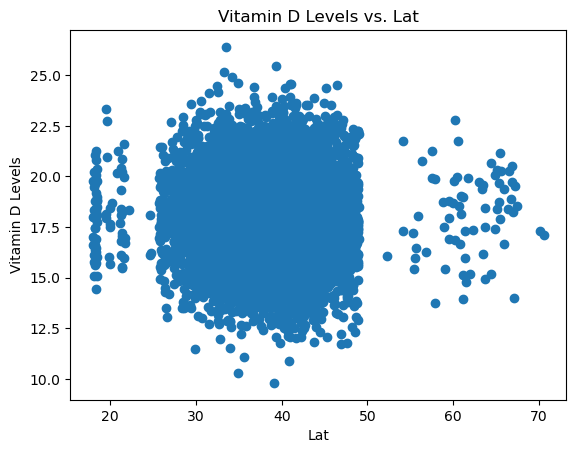

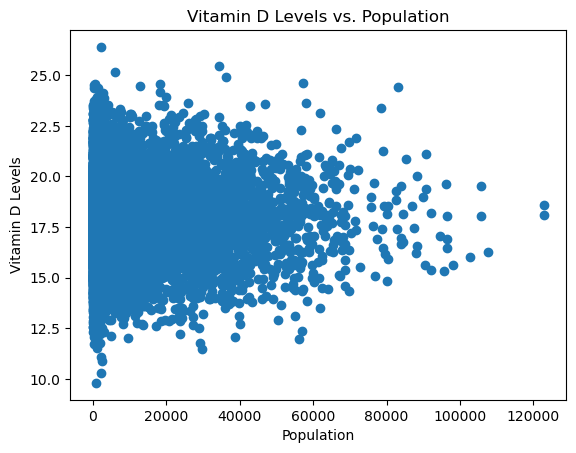

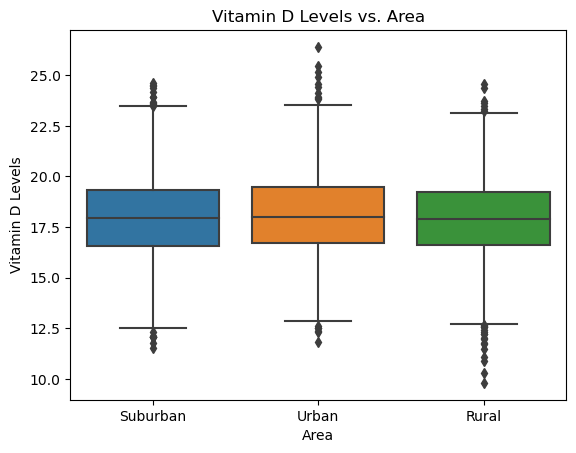

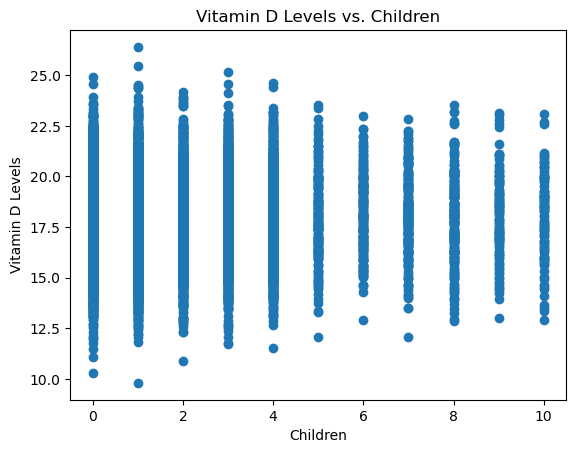

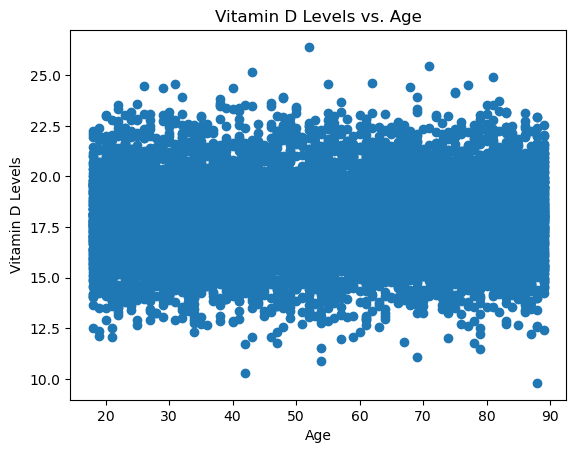

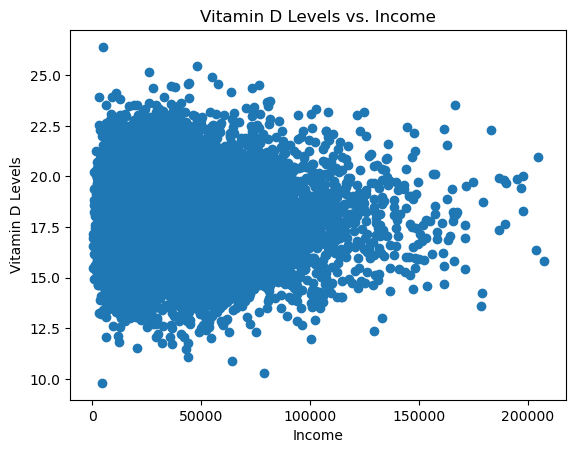

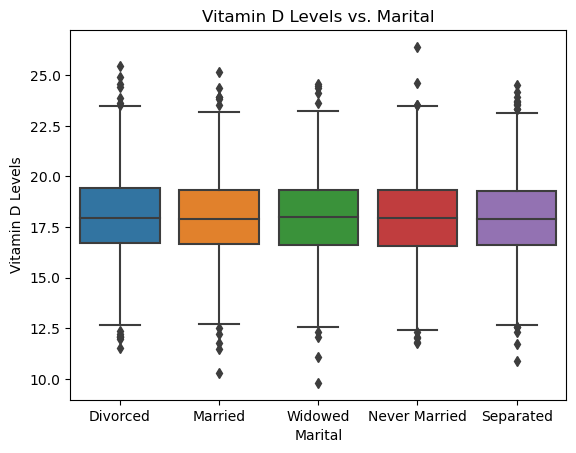

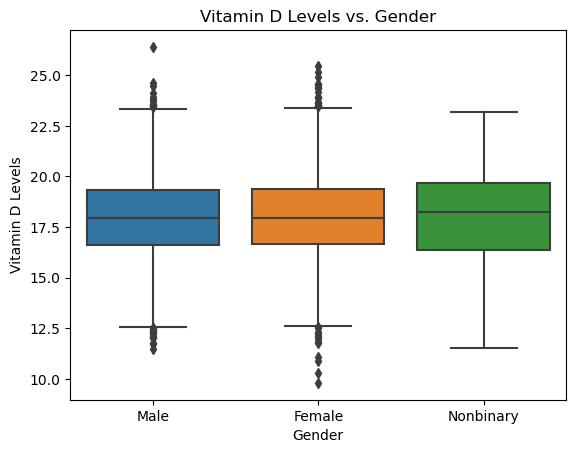

In [11]:
# Create bivariate visualizations for each dependent/independent variable combination
for col in columns:
    if col != 'VitD_levels':
        # Scatterplot if continuous vs. continuous
        if df[col].dtype != 'object':
            plt.scatter(df[col], df['VitD_levels'])
            plt.title(f'Vitamin D Levels vs. {col}')
            plt.xlabel(col)
            plt.ylabel('Vitamin D Levels')
            plt.show()
        # Boxplot if continuous vs. categorical
        else:
            sns.boxplot(x=col, y='VitD_levels', data=df)
            plt.title(f'Vitamin D Levels vs. {col}')
            plt.ylabel('Vitamin D Levels')
            plt.show()

# Modeling

In [43]:
# Initial model to check Vitamin D Levels against all identified explanatory variables.
mdl_vitd_initial = ols(f'VitD_levels ~ Lat + Population + Area + Children + Age + Income + Marital + Gender + 0', data=df).fit()
mdl_vitd_initial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            VitD_levels   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.427
Date:                Tue, 20 Feb 2024   Prob (F-statistic):              0.138
Time:                        15:24:17   Log-Likelihood:                -21197.
No. Observations:               10000   AIC:                         4.242e+04
Df Residuals:                    9986   BIC:                         4.252e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Area[Rural]                 17.8729      0.175    102.060      0.000      17.530      18.216
Area[Suburban]              17.9178      0.175    102.336      0.000      17.575      18.261
Area[Urban]                 18.0387      0.175    103.157      0.000      17.696      18.382
Marital[T.Married]          -0.0187      0.064     -0.292      0.770      -0.144       0.107
Marital[T.Never Married]    -0.0456      0.064     -0.709      0.478      -0.172       0.080
Marital[T.Separated]        -0.0255      0.064     -0.397      0.691      -0.151       0.100
Marital[T.Widowed]          -0.0393      0.064     -0.617      0.537      -0.164       0.086
Gender[T.Male]              -0.0481      0.041     -1.178      0.239      -0.128       0.032
Gender[T.Nonbinary]          0.0868      0.141      0.616      0.538      -0.189       0.363
Lat                          0.0008      0.004      0.208      0.835      -0.007       0.008
Population                3.837e-07   1.39e-06      0.276      0.783   -2.34e-06    3.11e-06
Children                     0.0089      0.009      0.956      0.339      -0.009       0.027
Age                          0.0010      0.001      1.024      0.306      -0.001       0.003
Income                    -9.44e-07   7.08e-07     -1.334      0.182   -2.33e-06    4.43e-07
==============================================================================
Omnibus:                        2.075   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.354   Jarque-Bera (JB):                2.106
Skew:                           0.031   Prob(JB):                        0.349
Kurtosis:                       2.965   Cond. No.                     7.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

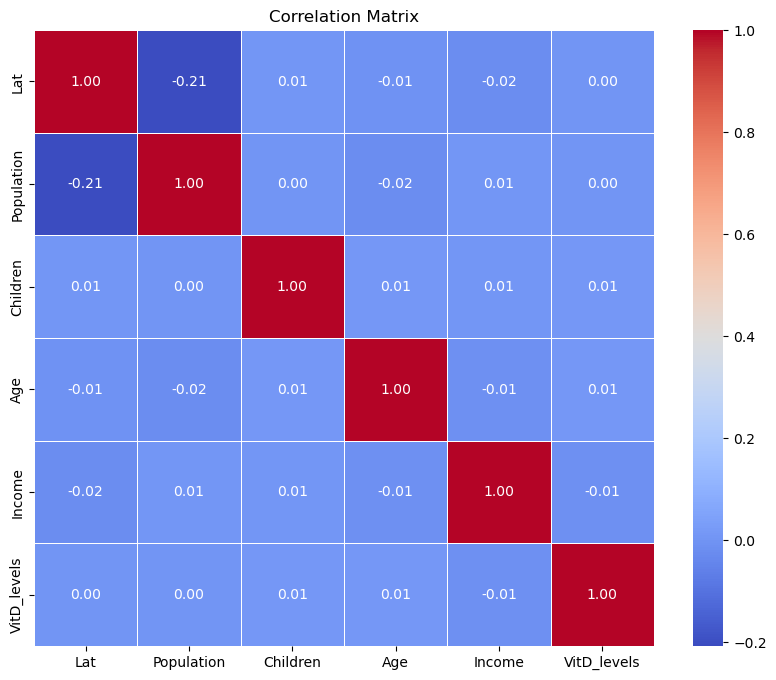

In [44]:
# Correlation matrix to check for multicollinearity
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [45]:
# Reduced model eliminating Lat
mdl_vitd_v2 = ols(f'VitD_levels ~ Population + Area + Children + Age + Income + Marital + Gender + 0', data=df).fit()
mdl_vitd_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            VitD_levels   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.542
Date:                Tue, 20 Feb 2024   Prob (F-statistic):              0.101
Time:                        15:24:18   Log-Likelihood:                -21197.
No. Observations:               10000   AIC:                         4.242e+04
Df Residuals:                    9987   BIC:                         4.251e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Area[Rural]                 17.9045      0.087    206.650      0.000      17.735      18.074
Area[Suburban]              17.9493      0.087    205.756      0.000      17.778      18.120
Area[Urban]                 18.0703      0.087    208.341      0.000      17.900      18.240
Marital[T.Married]          -0.0186      0.064     -0.291      0.771      -0.144       0.107
Marital[T.Never Married]    -0.0455      0.064     -0.707      0.479      -0.171       0.080
Marital[T.Separated]        -0.0256      0.064     -0.398      0.690      -0.151       0.100
Marital[T.Widowed]          -0.0394      0.064     -0.619      0.536      -0.164       0.086
Gender[T.Male]              -0.0481      0.041     -1.179      0.239      -0.128       0.032
Gender[T.Nonbinary]          0.0867      0.141      0.616      0.538      -0.189       0.363
Population                3.237e-07   1.36e-06      0.238      0.812   -2.34e-06    2.99e-06
Children                     0.0089      0.009      0.957      0.338      -0.009       0.027
Age                          0.0010      0.001      1.022      0.307      -0.001       0.003
Income                   -9.468e-07   7.07e-07     -1.338      0.181   -2.33e-06     4.4e-07
==============================================================================
Omnibus:                        2.091   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.351   Jarque-Bera (JB):                2.122
Skew:                           0.031   Prob(JB):                        0.346
Kurtosis:                       2.965   Cond. No.                     3.92e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
# Reduced model eliminating Lat, Population
mdl_vitd_v3 = ols(f'VitD_levels ~ Area + Children + Age + Income + Marital + Gender + 0', data=df).fit()
mdl_vitd_v3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            VitD_levels   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.677
Date:                Tue, 20 Feb 2024   Prob (F-statistic):             0.0719
Time:                        15:24:18   Log-Likelihood:                -21197.
No. Observations:               10000   AIC:                         4.242e+04
Df Residuals:                    9988   BIC:                         4.250e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Area[Rural]                 17.9078      0.086    209.413      0.000      17.740      18.075
Area[Suburban]              17.9529      0.086    208.939      0.000      17.784      18.121
Area[Urban]                 18.0738      0.085    211.459      0.000      17.906      18.241
Marital[T.Married]          -0.0187      0.064     -0.292      0.770      -0.144       0.107
Marital[T.Never Married]    -0.0455      0.064     -0.708      0.479      -0.171       0.080
Marital[T.Separated]        -0.0257      0.064     -0.400      0.689      -0.152       0.100
Marital[T.Widowed]          -0.0396      0.064     -0.622      0.534      -0.165       0.085
Gender[T.Male]              -0.0480      0.041     -1.178      0.239      -0.128       0.032
Gender[T.Nonbinary]          0.0871      0.141      0.619      0.536      -0.189       0.363
Children                     0.0089      0.009      0.958      0.338      -0.009       0.027
Age                          0.0010      0.001      1.018      0.309      -0.001       0.003
Income                    -9.46e-07   7.07e-07     -1.337      0.181   -2.33e-06    4.41e-07
==============================================================================
Omnibus:                        2.093   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.351   Jarque-Bera (JB):                2.124
Skew:                           0.031   Prob(JB):                        0.346
Kurtosis:                       2.965   Cond. No.                     3.83e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
# Reduced model eliminating Lat, Population, Marital
mdl_vitd_v4 = ols(f'VitD_levels ~ Area + Children + Age + Income + Gender + 0', data=df).fit()
mdl_vitd_v4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            VitD_levels   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.547
Date:                Tue, 20 Feb 2024   Prob (F-statistic):             0.0128
Time:                        15:24:18   Log-Likelihood:                -21197.
No. Observations:               10000   AIC:                         4.241e+04
Df Residuals:                    9992   BIC:                         4.247e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Area[Rural]            17.8807      0.075    239.744      0.000      17.734      18.027
Area[Suburban]         17.9263      0.075    237.822      0.000      17.779      18.074
Area[Urban]            18.0467      0.075    242.005      0.000      17.901      18.193
Gender[T.Male]         -0.0480      0.041     -1.178      0.239      -0.128       0.032
Gender[T.Nonbinary]     0.0889      0.141      0.631      0.528      -0.187       0.365
Children                0.0091      0.009      0.977      0.329      -0.009       0.027
Age                     0.0010      0.001      1.026      0.305      -0.001       0.003
Income              -9.441e-07   7.07e-07     -1.335      0.182   -2.33e-06    4.42e-07
==============================================================================
Omnibus:                        2.079   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.354   Jarque-Bera (JB):                2.110
Skew:                           0.031   Prob(JB):                        0.348
Kurtosis:                       2.966   Cond. No.                     3.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
# Reduced model eliminating Lat, Population, Marital, Gender
mdl_vitd_v5 = ols(f'VitD_levels ~ Area + Children + Age + Income + 0', data=df).fit()
mdl_vitd_v5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            VitD_levels   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.158
Date:                Tue, 20 Feb 2024   Prob (F-statistic):            0.00750
Time:                        15:24:18   Log-Likelihood:                -21198.
No. Observations:               10000   AIC:                         4.241e+04
Df Residuals:                    9994   BIC:                         4.245e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Area[Rural]       17.8580      0.072    249.599      0.000      17.718      17.998
Area[Suburban]    17.9044      0.072    247.026      0.000      17.762      18.046
Area[Urban]       18.0249      0.072    251.790      0.000      17.885      18.165
Children           0.0091      0.009      0.980      0.327      -0.009       0.027
Age                0.0010      0.001      1.048      0.295      -0.001       0.003
Income         -9.455e-07   7.07e-07     -1.337      0.181   -2.33e-06     4.4e-07
==============================================================================
Omnibus:                        2.052   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.358   Jarque-Bera (JB):                2.083
Skew:                           0.032   Prob(JB):                        0.353
Kurtosis:                       2.968   Cond. No.                     2.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
# Reduced model eliminating Lat, Population, Marital, Gender, Children
mdl_vitd_v6 = ols(f'VitD_levels ~ Area + Age + Income + 0', data=df).fit()
mdl_vitd_v6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            VitD_levels   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.708
Date:                Tue, 20 Feb 2024   Prob (F-statistic):            0.00509
Time:                        15:24:19   Log-Likelihood:                -21199.
No. Observations:               10000   AIC:                         4.241e+04
Df Residuals:                    9995   BIC:                         4.244e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Area[Rural]       17.8763      0.069    258.813      0.000      17.741      18.012
Area[Suburban]    17.9235      0.070    256.676      0.000      17.787      18.060
Area[Urban]       18.0430      0.069    260.855      0.000      17.907      18.179
Age                0.0010      0.001      1.057      0.290      -0.001       0.003
Income         -9.405e-07   7.07e-07     -1.330      0.183   -2.33e-06    4.45e-07
==============================================================================
Omnibus:                        2.065   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.356   Jarque-Bera (JB):                2.096
Skew:                           0.032   Prob(JB):                        0.351
Kurtosis:                       2.969   Cond. No.                     2.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
# Reduced model eliminating Lat, Population, Marital, Gender, Children, Age
mdl_vitd_v7 = ols(f'VitD_levels ~ Area + Income + 0', data=df).fit()
mdl_vitd_v7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            VitD_levels   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.571
Date:                Tue, 20 Feb 2024   Prob (F-statistic):            0.00334
Time:                        15:24:19   Log-Likelihood:                -21199.
No. Observations:               10000   AIC:                         4.241e+04
Df Residuals:                    9996   BIC:                         4.244e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Area[Rural]       17.9319      0.045    400.038      0.000      17.844      18.020
Area[Suburban]    17.9797      0.045    397.471      0.000      17.891      18.068
Area[Urban]       18.0981      0.045    398.577      0.000      18.009      18.187
Income         -9.496e-07   7.07e-07     -1.343      0.179   -2.34e-06    4.36e-07
==============================================================================
Omnibus:                        2.104   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.349   Jarque-Bera (JB):                2.135
Skew:                           0.032   Prob(JB):                        0.344
Kurtosis:                       2.968   Cond. No.                     1.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
# Final model with just Area
mdl_vitd_reduced = ols(f'VitD_levels ~ Area + 0', data=df).fit()
mdl_vitd_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            VitD_levels   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.954
Date:                Tue, 20 Feb 2024   Prob (F-statistic):            0.00261
Time:                        15:59:40   Log-Likelihood:                -21200.
No. Observations:               10000   AIC:                         4.241e+04
Df Residuals:                    9997   BIC:                         4.243e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           17.8938      0.035    515.126      0.000      17.826      17.962
Area[T.Suburban]     0.0473      0.049      0.960      0.337      -0.049       0.144
Area[T.Urban]        0.1656      0.049      3.354      0.001       0.069       0.262
==============================================================================
Omnibus:                        2.091   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.352   Jarque-Bera (JB):                2.122
Skew:                           0.032   Prob(JB):                        0.346
Kurtosis:                       2.967   Cond. No.                         3.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Evaluate Model

In [54]:
# Probability (F-statistic from each model)
print(mdl_vitd_initial.f_pvalue)
print(mdl_vitd_v2.f_pvalue)
print(mdl_vitd_v3.f_pvalue)
print(mdl_vitd_v4.f_pvalue)
print(mdl_vitd_v5.f_pvalue)
print(mdl_vitd_v6.f_pvalue)
print(mdl_vitd_v7.f_pvalue)
print(mdl_vitd_reduced.f_pvalue)

0.13804412969342178
0.10136985587854859
0.07185630144055472
0.012831902665422628
0.007499151017148603
0.005087365191466266
0.0033374703747328857
0.002605732320014742


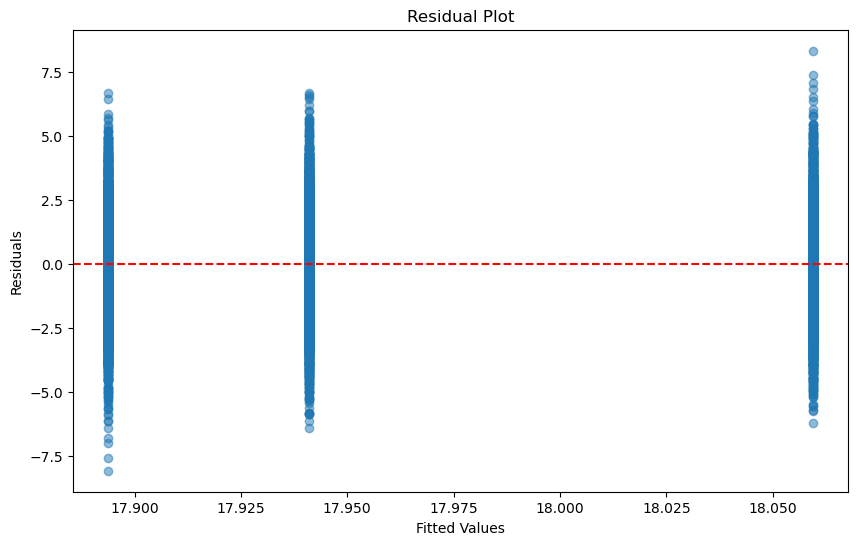

In [55]:
# Extract the fitted values (predicted values) and residuals from the model
fitted_values = mdl_vitd_v8.fittedvalues
residuals = mdl_vitd_v8.resid

# Create the residual plot
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Display the plot
plt.show()


In [56]:
mse = mdl_vitd_v8.mse_resid
print(f'MSE: {mse}')
rse = np.sqrt(mse)
print(f'RSE: {rse}')

MSE: 4.065193218004238
RSE: 2.016232431542613


# Check if removing Outliers makes a difference in model

In [22]:
# Copy the original DataFrame to preserve the original data
df_copy = df.copy()
print(f'Initial shape: {df.shape}')

# Initialize a Series to keep track of rows to remove (start with all False)
outliers_mask = pd.Series([False] * df.shape[0])

for col in df.columns:
    if df[col].dtype != 'object':
        # Calculate IQR and bounds for each numeric column
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Update the outliers mask
        col_outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
        outliers_mask = outliers_mask | col_outliers
        
        # Count and display number of outliers for the column
        num_outliers_col = col_outliers.sum()
        print(f"{col} has {num_outliers_col} outliers")

# Remove rows marked as outliers
df_filtered = df[~outliers_mask]
print(f'Shape after removing all outliers: {df_filtered.shape}')

# If you want to remove 'Nonbinary' from 'Gender', do so after removing outliers
print(df_filtered['Gender'].value_counts())
df_filtered = df_filtered[df_filtered['Gender'] != 'Nonbinary']
print(f"Shape after removing Nonbinary: {df_filtered.shape}")

# Optional: Reset index after removal
df_filtered.reset_index(drop=True, inplace=True)

Initial shape: (10000, 9)
Lat has 150 outliers
Population has 855 outliers
Children has 411 outliers
Age has 0 outliers
Income has 326 outliers
VitD_levels has 60 outliers
Shape after removing all outliers: (8319, 9)
Female       4182
Male         3970
Nonbinary     167
Name: Gender, dtype: int64
Shape after removing 'Nonbinary' from 'Gender': (8152, 9)


In [24]:
# Initial model to check Vitamin D Levels against all identified explanatory variables.
mdl_vitd_initial = ols(f'VitD_levels ~ Lat + Population + Area + Children + Age + Income + Marital + Gender + 0', data=df).fit()
mdl_vitd_initial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            VitD_levels   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.427
Date:                Tue, 20 Feb 2024   Prob (F-statistic):              0.138
Time:                        13:15:41   Log-Likelihood:                -21197.
No. Observations:               10000   AIC:                         4.242e+04
Df Residuals:                    9986   BIC:                         4.252e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Area[Rural]                 17.8729      0.175    102.060      0.000      17.530      18.216
Area[Suburban]              17.9178      0.175    102.336      0.000      17.575      18.261
Area[Urban]                 18.0387      0.175    103.157      0.000      17.696      18.382
Marital[T.Married]          -0.0187      0.064     -0.292      0.770      -0.144       0.107
Marital[T.Never Married]    -0.0456      0.064     -0.709      0.478      -0.172       0.080
Marital[T.Separated]        -0.0255      0.064     -0.397      0.691      -0.151       0.100
Marital[T.Widowed]          -0.0393      0.064     -0.617      0.537      -0.164       0.086
Gender[T.Male]              -0.0481      0.041     -1.178      0.239      -0.128       0.032
Gender[T.Nonbinary]          0.0868      0.141      0.616      0.538      -0.189       0.363
Lat                          0.0008      0.004      0.208      0.835      -0.007       0.008
Population                3.837e-07   1.39e-06      0.276      0.783   -2.34e-06    3.11e-06
Children                     0.0089      0.009      0.956      0.339      -0.009       0.027
Age                          0.0010      0.001      1.024      0.306      -0.001       0.003
Income                    -9.44e-07   7.08e-07     -1.334      0.182   -2.33e-06    4.43e-07
==============================================================================
Omnibus:                        2.075   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.354   Jarque-Bera (JB):                2.106
Skew:                           0.031   Prob(JB):                        0.349
Kurtosis:                       2.965   Cond. No.                     7.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# Final model with just Area
mdl_vitd_reduced = ols(f'VitD_levels ~ Area + 0', data=df).fit()
mdl_vitd_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            VitD_levels   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.954
Date:                Tue, 20 Feb 2024   Prob (F-statistic):            0.00261
Time:                        14:19:16   Log-Likelihood:                -21200.
No. Observations:               10000   AIC:                         4.241e+04
Df Residuals:                    9997   BIC:                         4.243e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Area[Rural]       17.8938      0.035    515.126      0.000      17.826      17.962
Area[Suburban]    17.9411      0.035    513.335      0.000      17.873      18.010
Area[Urban]       18.0594      0.035    514.775      0.000      17.991      18.128
==============================================================================
Omnibus:                        2.091   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.352   Jarque-Bera (JB):                2.122
Skew:                           0.032   Prob(JB):                        0.346
Kurtosis:                       2.967   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE: 4.065193218004238
RSE: 2.016232431542613


# More Visualizations

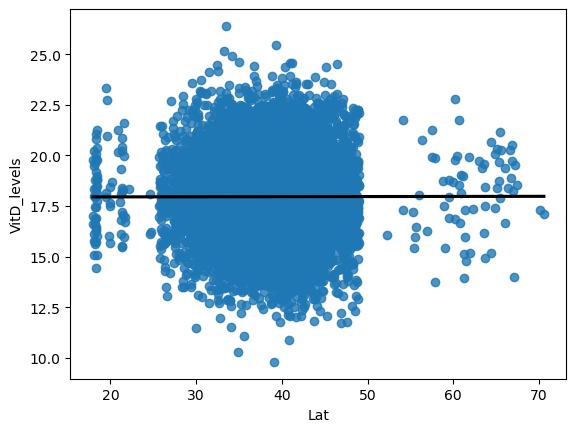

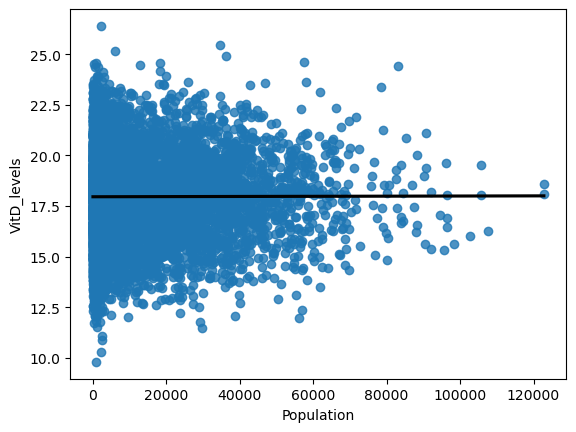

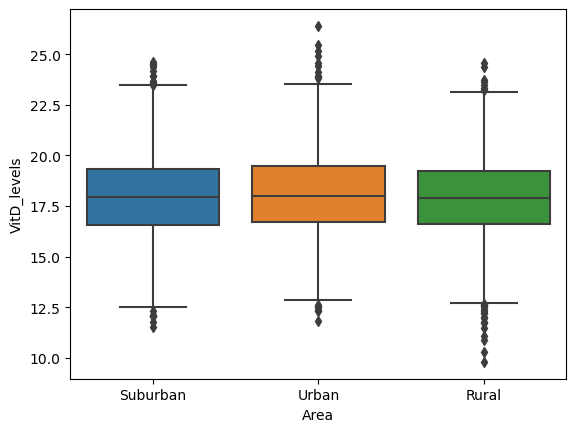

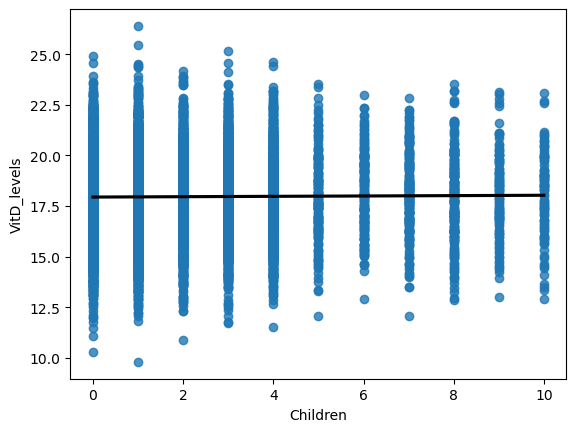

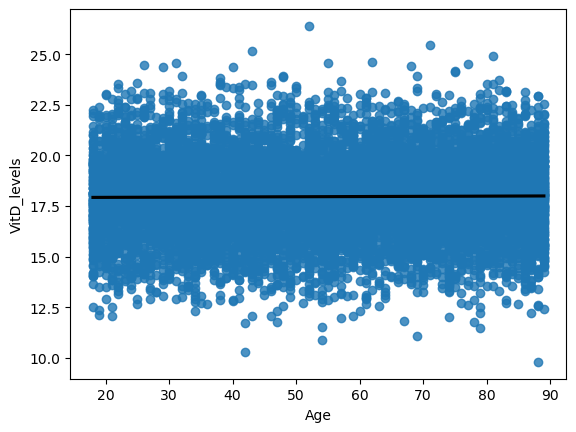

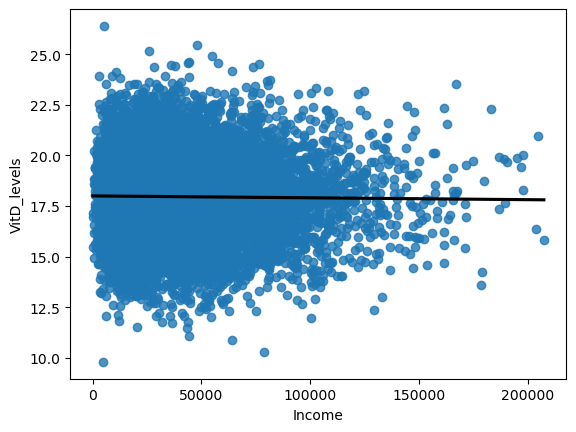

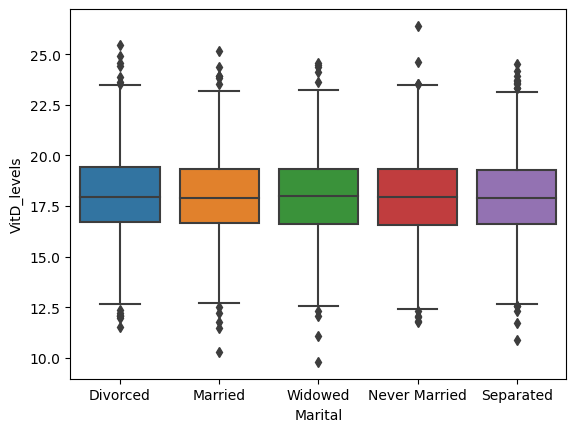

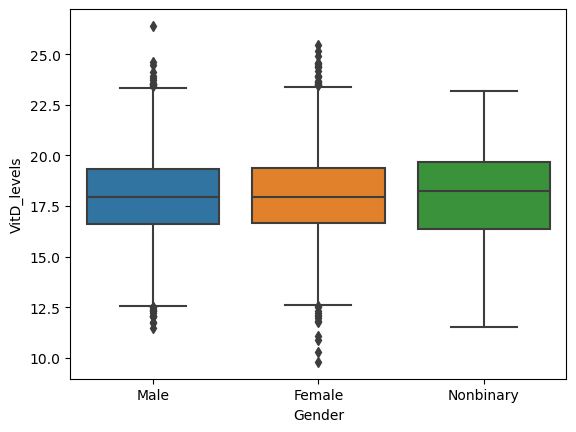

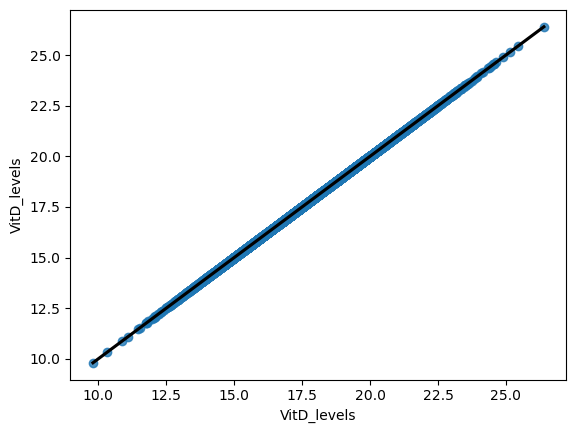

In [23]:
for col in columns:
    if df[col].dtype != 'object':
        sns.regplot(x=col, y='VitD_levels', data=df, ci=None, line_kws={'color':'black'})
        plt.show()
    else:
        sns.boxplot(x=col, y='VitD_levels', data=df)
        plt.show()